# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

### Assignments 1: 
#### Find `Most Common Words` and create word cloud.

#### Read in the document-term matrix

In [1]:
import pandas as pd
df = pd.read_pickle('dtm.pkl')
df = df.transpose()
df.head()

,ali,amy,andrew,anthony,beth,bill,chelsea,joe,mae,matt,michelle,mike,neal,roseanne,sammy,sarah,shane,stavros,taylor,whitney
abc,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0
ability,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
able,2,2,2,0,3,1,3,2,0,3,4,0,1,8,0,1,0,2,2,0
abort,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
abortion,0,1,0,2,2,2,0,1,1,0,17,0,0,1,0,7,0,0,0,0


#### Find  and print the top 30 words said by each comedian


In [2]:
top_dict = {}   

for person in df.columns:
    top_word = df[person].sort_values(ascending = False).head(30)
    top_dict[person] = list(zip(top_word.index, top_word.values))
top_dict

{'ali': [('and', 245),
  ('the', 201),
  ('you', 185),
  ('that', 129),
  ('like', 126),
  ('they', 76),
  ('when', 71),
  ('know', 69),
  ('just', 64),
  ('dont', 61),
  ('all', 58),
  ('your', 47),
  ('for', 46),
  ('because', 46),
  ('have', 44),
  ('get', 42),
  ('this', 40),
  ('with', 40),
  ('shit', 35),
  ('thats', 34),
  ('then', 33),
  ('not', 32),
  ('youre', 31),
  ('very', 31),
  ('him', 31),
  ('out', 30),
  ('gonna', 28),
  ('their', 27),
  ('can', 27),
  ('had', 27)],
 'amy': [('you', 252),
  ('and', 206),
  ('like', 195),
  ('the', 174),
  ('know', 100),
  ('that', 75),
  ('just', 62),
  ('youre', 54),
  ('what', 52),
  ('have', 50),
  ('were', 44),
  ('are', 41),
  ('there', 41),
  ('this', 41),
  ('with', 40),
  ('thats', 40),
  ('right', 37),
  ('about', 36),
  ('for', 36),
  ('not', 34),
  ('your', 34),
  ('guy', 33),
  ('dont', 33),
  ('but', 33),
  ('all', 30),
  ('get', 30),
  ('yeah', 28),
  ('okay', 26),
  ('then', 24),
  ('one', 24)],
 'andrew': [('you', 345)

#### By looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that. Look at the most common top words and add them to the stop word list.



In [3]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in df.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)

print(words[:10])

['and', 'the', 'you', 'that', 'like', 'they', 'when', 'know', 'just', 'dont']


#### Let's aggregate this list and identify the most common words along with how many routines they occur in


In [4]:
print(Counter(words).most_common())

[('and', 20), ('the', 20), ('you', 20), ('that', 20), ('like', 20), ('know', 20), ('dont', 20), ('for', 20), ('this', 20), ('with', 20), ('just', 19), ('have', 19), ('thats', 17), ('not', 17), ('what', 17), ('your', 16), ('get', 16), ('but', 16), ('they', 15), ('all', 15), ('are', 15), ('there', 14), ('one', 14), ('about', 13), ('youre', 12), ('out', 11), ('were', 10), ('right', 10), ('guy', 9), ('then', 8), ('she', 7), ('got', 6), ('want', 6), ('people', 6), ('yeah', 5), ('think', 5), ('when', 4), ('gonna', 4), ('would', 4), ('because', 3), ('shit', 3), ('can', 3), ('had', 3), ('say', 3), ('theyre', 3), ('how', 3), ('her', 3), ('going', 3), ('very', 2), ('him', 2), ('okay', 2), ('man', 2), ('said', 2), ('fuck', 2), ('fucking', 2), ('now', 2), ('their', 1), ('joke', 1), ('here', 1), ('them', 1), ('his', 1), ('back', 1), ('fuckin', 1), ('cat', 1), ('see', 1), ('feel', 1), ('men', 1), ('women', 1), ('well', 1), ('jesus', 1), ('jewish', 1), ('genocide', 1), ('israel', 1), ('didnt', 1), ('

#### If more than half of the comedians have it as a top word, exclude it from the list


In [5]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 10]
print(add_stop_words)

['and', 'the', 'you', 'that', 'like', 'know', 'dont', 'for', 'this', 'with', 'just', 'have', 'thats', 'not', 'what', 'your', 'get', 'but', 'they', 'all', 'are', 'there', 'one', 'about', 'youre', 'out']


In [6]:
# Let's update our document-term matrix with the new list of stop words
import pickle
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer


# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use

pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")


In [7]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


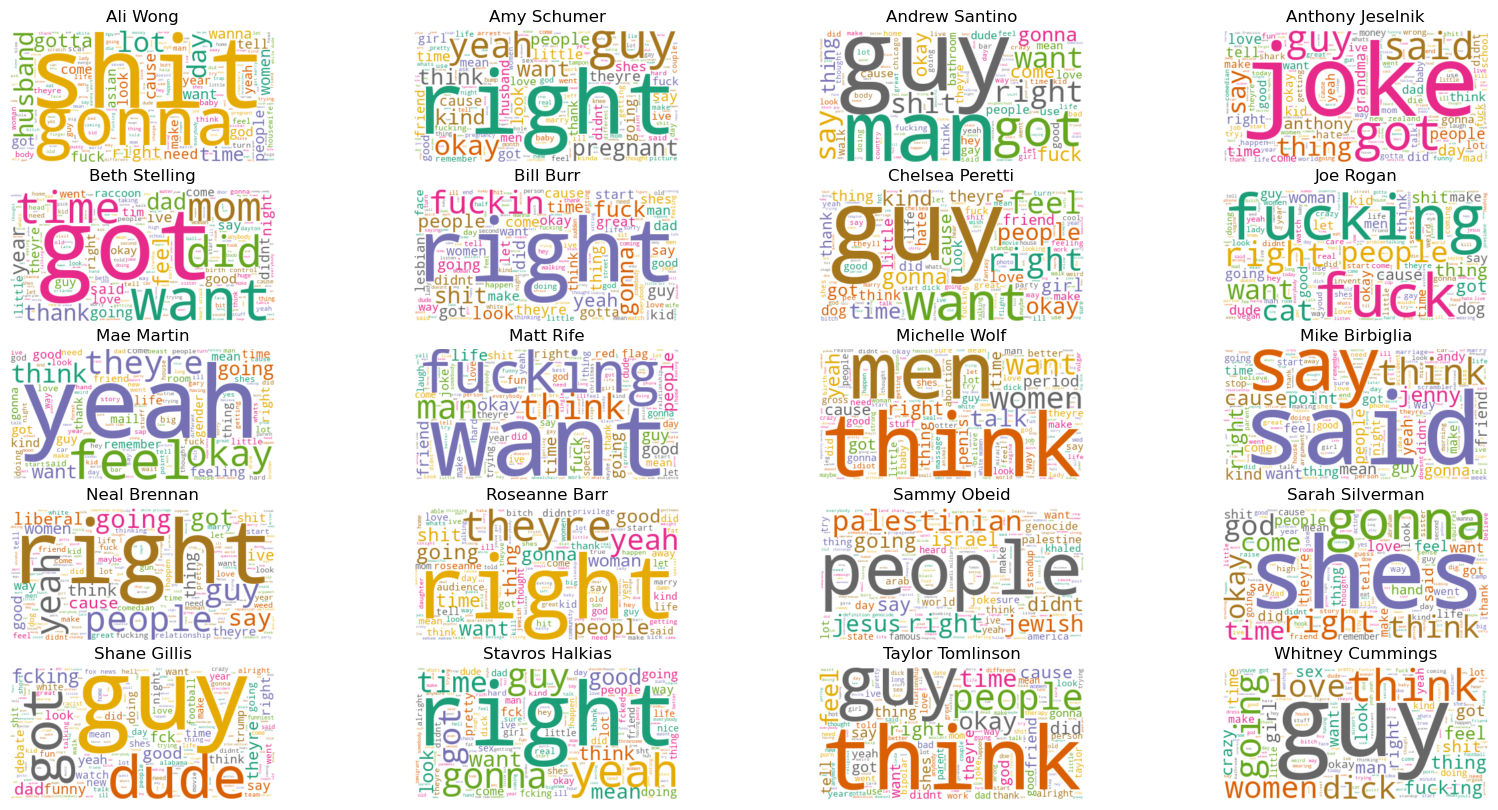

In [8]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

full_names = ['Ali Wong', 'Amy Schumer','Andrew Santino','Anthony Jeselnik', 'Beth Stelling','Bill Burr', 'Chelsea Peretti','Joe Rogan','Mae Martin' ,'Matt Rife',
              'Michelle Wolf', 'Mike Birbiglia','Neal Brennan','Roseanne Barr','Sammy Obeid', 'Sarah Silverman','Shane Gillis', 'Stavros Halkias', 'Taylor Tomlinson', 'Whitney Cummings']


# Create subplots for each comedian
for index, comedian in enumerate(df.columns):
    wc.generate(data_clean.transcript[comedian])
    plt.subplot(5,4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Observations
##### 1.Matt Rife, Joe Rogan might have similar comedy style due to their corpus
##### 2. Sammy Obeid,Shane Gillis, Neal Brenan are talking about politics/current affairs in their acts.(Palestine, Israel,genocide etc.)
##### 3. Amy Schumer, Whitney Cummings,Michelle Wolf perform women centric or feminist genre of skits
##### 4. a lot of common words like right,guy,think being spoken
##### 5. a lot of swear words generated

### Assignment 2:
#### Find the number of unique words that each comedian uses.

In [9]:
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in df.columns:
    uniques = df[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
14,Sammy Obeid,419
16,Shane Gillis,924
1,Amy Schumer,950
3,Anthony Jeselnik,952
10,Michelle Wolf,986
19,Whitney Cummings,990
0,Ali Wong,1072
15,Sarah Silverman,1113
2,Andrew Santino,1114
13,Roseanne Barr,1132


In [10]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in df.columns:
    totals = sum(df[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 60, 71, 59, 59, 82, 74, 63, 70, 73, 59, 76,63,66,8,71,48,54,61,55]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Amy Schumer,950,4613,60,76.883333
4,Beth Stelling,1135,4779,59,81.000000
3,Anthony Jeselnik,952,4798,59,81.322034
0,Ali Wong,1072,5031,60,83.850000
15,Sarah Silverman,1113,6031,71,84.943662
12,Neal Brennan,1147,5630,63,89.365079
13,Roseanne Barr,1132,6102,66,92.454545
9,Matt Rife,1146,7068,73,96.821918
10,Michelle Wolf,986,5724,59,97.016949
6,Chelsea Peretti,1274,7181,74,97.040541


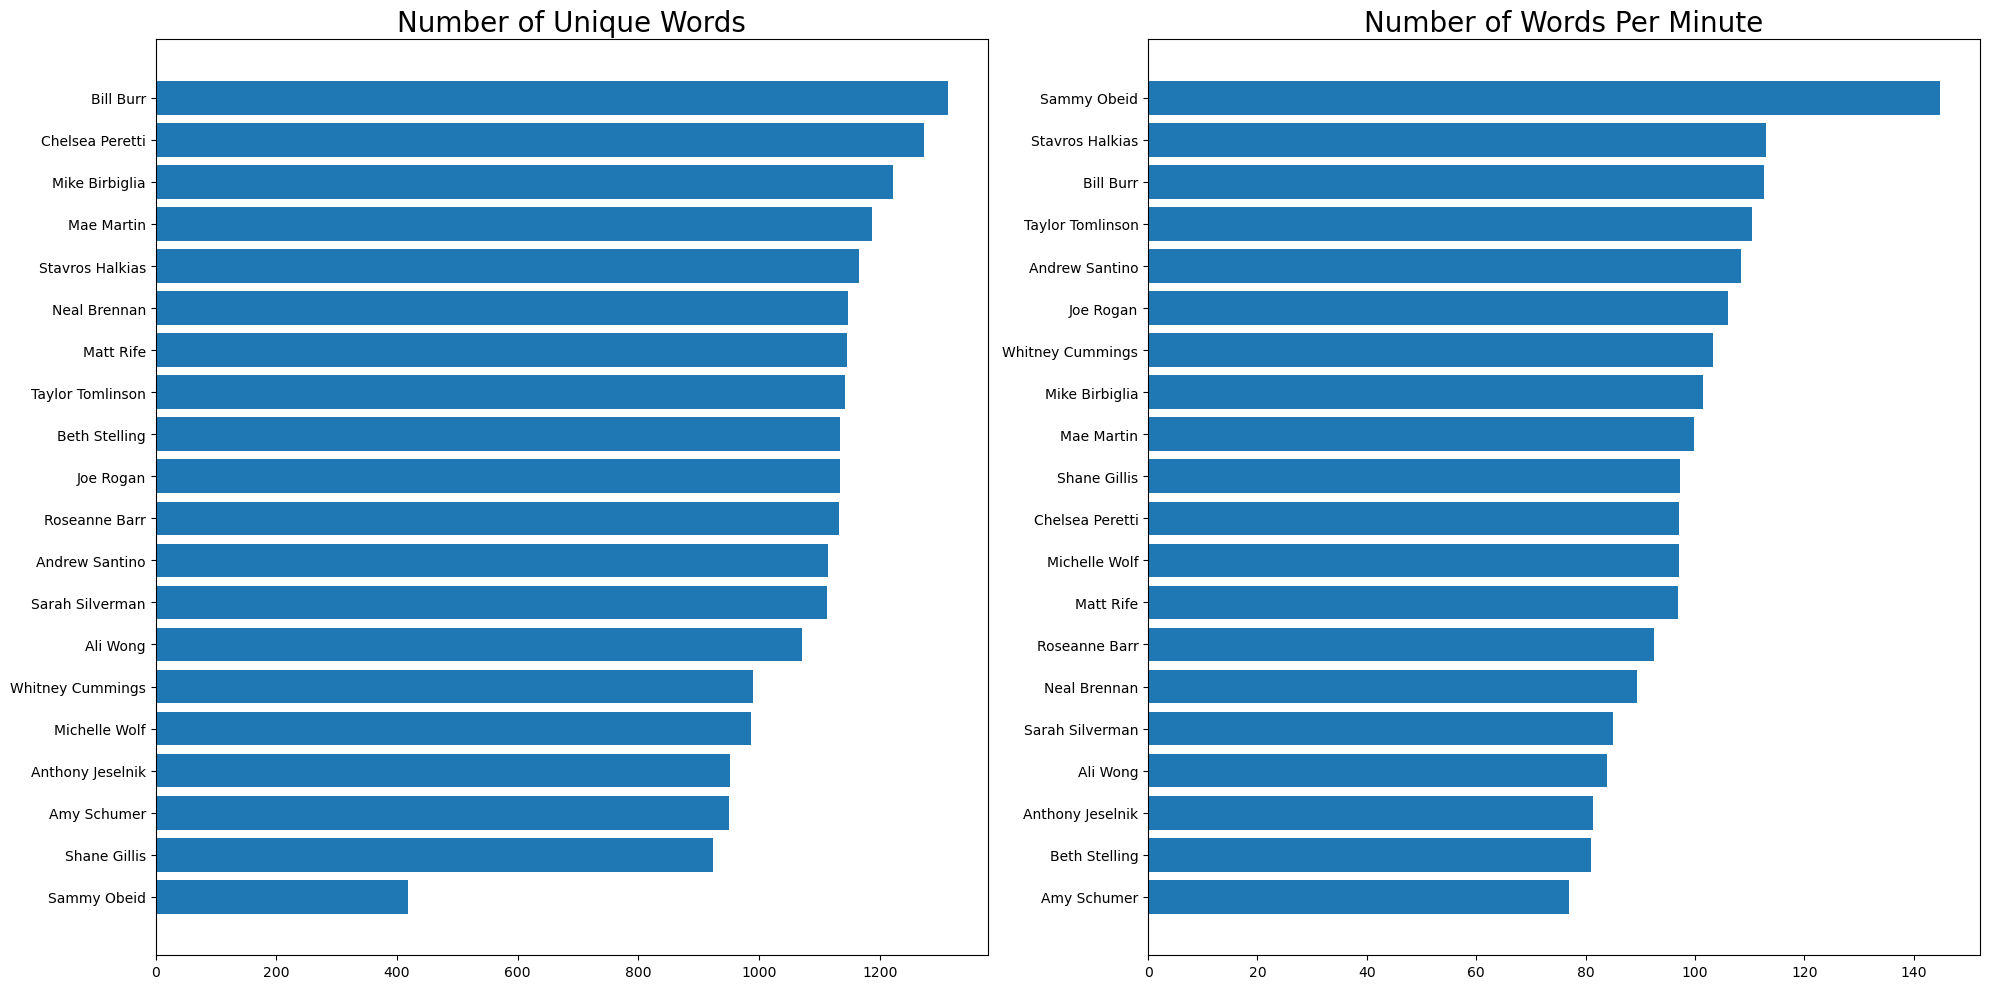

In [11]:
# plot our findings
import numpy as np
y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()


#### Write your findings. For example:
* **Vocabulary**
   * Chelsea Feretti and Bill Burr (podcast host) use a lot of words in their comedy
   * Shane Gillis and Sammy Obeid have a smaller vocabulary


* **Talking Speed**
   * Sammy Obeid and Stravos Halkies talk fast
   * Amy Schumer and Beth Stelling talk slow
   
Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

### Assignment 3: 
#### Check the profanity by analysing the common bad words, like `fucking`, `fuck`, `shit etc.

In [12]:
# take a look at the most common words.
top_dict

{'ali': [('and', 245),
  ('the', 201),
  ('you', 185),
  ('that', 129),
  ('like', 126),
  ('they', 76),
  ('when', 71),
  ('know', 69),
  ('just', 64),
  ('dont', 61),
  ('all', 58),
  ('your', 47),
  ('for', 46),
  ('because', 46),
  ('have', 44),
  ('get', 42),
  ('this', 40),
  ('with', 40),
  ('shit', 35),
  ('thats', 34),
  ('then', 33),
  ('not', 32),
  ('youre', 31),
  ('very', 31),
  ('him', 31),
  ('out', 30),
  ('gonna', 28),
  ('their', 27),
  ('can', 27),
  ('had', 27)],
 'amy': [('you', 252),
  ('and', 206),
  ('like', 195),
  ('the', 174),
  ('know', 100),
  ('that', 75),
  ('just', 62),
  ('youre', 54),
  ('what', 52),
  ('have', 50),
  ('were', 44),
  ('are', 41),
  ('there', 41),
  ('this', 41),
  ('with', 40),
  ('thats', 40),
  ('right', 37),
  ('about', 36),
  ('for', 36),
  ('not', 34),
  ('your', 34),
  ('guy', 33),
  ('dont', 33),
  ('but', 33),
  ('all', 30),
  ('get', 30),
  ('yeah', 28),
  ('okay', 26),
  ('then', 24),
  ('one', 24)],
 'andrew': [('you', 345)

In [13]:
# isolate just these bad words
data_bad_words = df.transpose()[['fucking', 'fuck','asshole','damn', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck+data_bad_words.asshole+data_bad_words.damn, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,20,35
amy,21,6
andrew,63,54
anthony,19,9
beth,3,1
bill,76,63
chelsea,26,11
joe,136,32
mae,18,1
matt,84,25


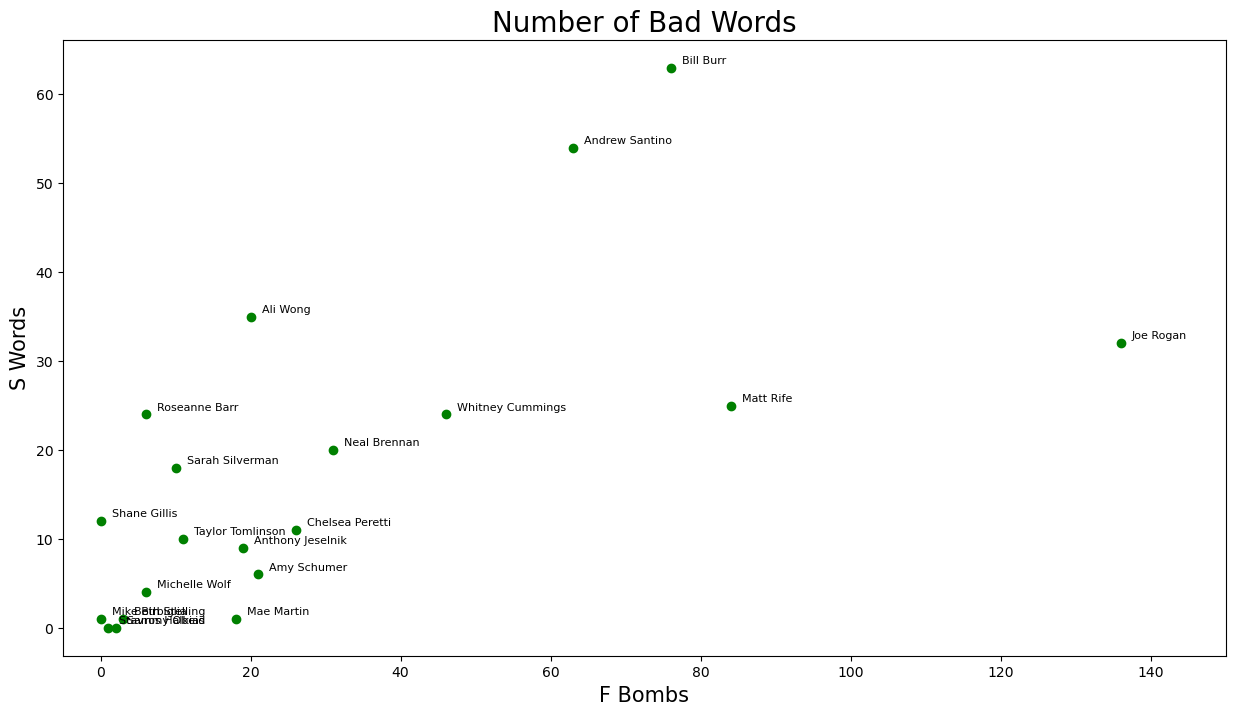

In [14]:
# create a scatter plot of your findings
plt.rcParams['figure.figsize'] = [15, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='green')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=8)
    plt.xlim(-5, 150) 
    
plt.title('Number of Bad Words', fontsize=20)
plt.xlabel('F Bombs', fontsize=15)
plt.ylabel('S Words', fontsize=15)

plt.show()


### Write your findings. 
#### For example:
* **Averaging 2 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Andrew Santino.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are Matt Rife,Beth Stellings,Stravos and Mike Birbiglia.

### Assignment 4:(optional)
What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

In [46]:
data_option_words = df.transpose()[['politics', 'conservative']]
data_option = pd.concat([data_option_words.politics, data_option_words.conservative], axis=1)
data_option.columns = ['politics', 'conservative']
data_option

,politics,conservative
ali,0,0
amy,0,0
andrew,0,0
anthony,0,0
beth,0,0
bill,0,0
chelsea,1,1
joe,0,0
mae,0,0
matt,1,0


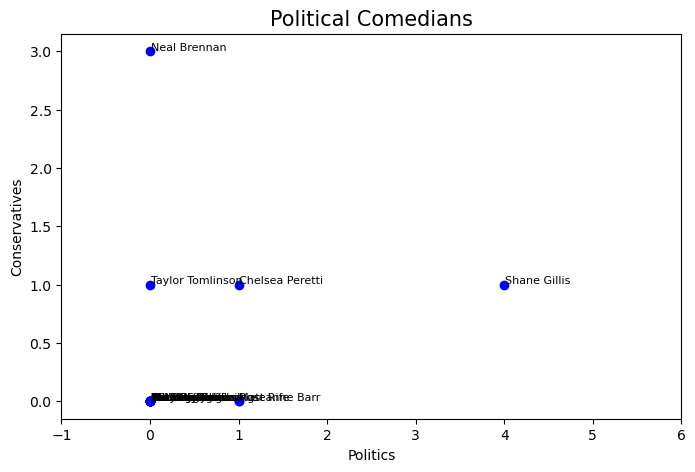

In [52]:
plt.rcParams['figure.figsize'] = [8, 5]

for i, comedian in enumerate(data_option.index):
    x = data_option.politics.loc[comedian]
    y = data_option.conservative.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+0.01, y+0.01, full_names[i], fontsize=8)
    plt.xlim(-1, 6) 
    
plt.title('Political Comedians', fontsize=15)
plt.xlabel('Politics', fontsize=10)
plt.ylabel('Conservatives', fontsize=10)

plt.show()


### Observations
##### Shane Gills and Neal Brennan are political comedians.